In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

class Constants():
    def __init__(self):
        self.msun = 1.989e33
        self.rsun = 6.955e10
        self.G  = 6.674e-8
        self.yr = 3.1536e7
        self.h  = 6.6260755e-27
        self.kB = 1.380658e-16
        self.mp = 1.6726219e-24
        self.me = 9.10938356e-28
        self.c  = 2.99792458e10
        self.pc = 3.085677581e18
        self.au = 1.496e13
        self.q = 4.8032068e-10
        self.eV = 1.6021772e-12
        self.sigmaSB = 5.67051e-5
        self.sigmaT = 6.6524e-25
        self.Rg = 8.3145e7
        self.a0 = 5.29177e-9
        self.arad = 7.5646e-15
        
        print( "Constants defined...")
        return None
    
    
c = Constants()

Constants defined...


In [2]:
## https://iopscience.iop.org/article/10.3847/1538-4357/abe59e/pdf eq 13, 14
# from Kleiser and Kasen 2014

def Lpl_tpl(E,mej,R0,kappa,Trec):
    E51 = E/1e51 # erg
    M10 = mej/10 # msun
    R500 =R0/500 #sun
    k04 = kappa/0.4 # cm2/g
    T6000 = Trec/6000 #k
    
    Lpl = 1.2e42*E51**(5/6) * M10**-0.5 * R500**(2/3) * k04**(-1/3) * T6000**(4/3) # erg/s
    tpl = 120*E51**(-1/6) * M10**0.5 * R500**(1/6) * k04**(1/6) * T6000**(-2/3) # d
    return Lpl,tpl



Lpl_tpl(1e47,0.1,300,0.4,5000)


(3.107232505953858e+39, 57.764446792097445)

Text(30, 5e+39, '$10^{47}$ erg')

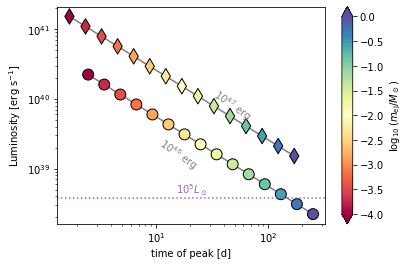

In [3]:
mp = np.logspace(-4,0,15)
lp,tp = Lpl_tpl(1e47,mp,400,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='d')
plt.colorbar(label=r'$\log_{10}( m_{\rm ej}/M_\odot )$',extend='both')

lp,tp = Lpl_tpl(1e46,mp,400,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='o')


plt.loglog()
plt.axhline(3.84e33*1e5,color='C4',linestyle=':')
plt.annotate(r'$10^5 L_\odot$',(15,3.84e33*1e5*1.15),color='C4',zorder=0)

plt.xlabel('time of peak [d]')
plt.ylabel('Luminosity [erg s$^{-1}$]')

plt.annotate(r"$10^{46}$ erg",(10,1e39),rotation=-35,color='grey')
plt.annotate(r"$10^{47}$ erg",(30,5e39),rotation=-35,color='grey')


Text(0, 0.5, 'Luminosity [erg s$^{-1}$]')

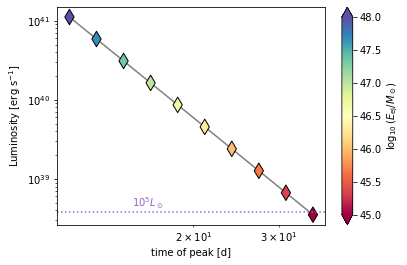

In [4]:
mp = 1e-2
Ep = np.logspace(45,48,10)
lp,tp = Lpl_tpl(Ep,mp,400,0.32,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(Ep),cmap='Spectral',s=120,edgecolors='k',marker='d')
plt.colorbar(label=r'$\log_{10}( E_{\rm ej}/M_\odot )$',extend='both')

plt.loglog()
plt.axhline(3.84e33*1e5,color='C4',linestyle=':')
plt.annotate(r'$10^5 L_\odot$',(15,3.84e33*1e5*1.15),color='C4',zorder=0)

plt.xlabel('time of peak [d]')
plt.ylabel('Luminosity [erg s$^{-1}$]')


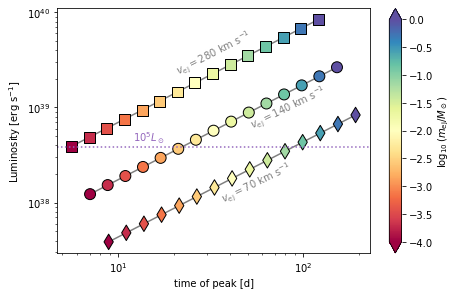

In [5]:
plt.figure(figsize=(7,4.5))
R0 = 400

mp = np.logspace(-4,0,15)
vp = 70*1e5
ep = 0.5*mp*c.msun*vp**2
lp,tp = Lpl_tpl(ep,mp,R0,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='d')


mp = np.logspace(-4,0,15)
vp = 140*1e5
ep = 0.5*mp*c.msun*vp**2
lp,tp = Lpl_tpl(ep,mp,R0,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='o')


mp = np.logspace(-4,0,15)
vp = 280*1e5
ep = 0.5*mp*c.msun*vp**2
lp,tp = Lpl_tpl(ep,mp,R0,0.4,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(mp),cmap='Spectral',s=120,edgecolors='k',marker='s')



plt.loglog()
plt.axhline(3.84e33*1e5,color='C4',linestyle=':')
plt.annotate(r'$10^5 L_\odot$',(12,3.84e33*1e5*1.15),color='C4',zorder=0)

plt.xlabel('time of peak [d]')
plt.ylabel('Luminosity [erg s$^{-1}$]')

plt.annotate(r'$v_{\rm ej}=70$ km s$^{-1}$',(35,1e38), rotation=26,color='grey')
plt.annotate(r'$v_{\rm ej}=140$ km s$^{-1}$',(50,6e38), rotation=26,color='grey')
plt.annotate(r'$v_{\rm ej}=280$ km s$^{-1}$',(20,2.2e39), rotation=27,color='grey')

plt.colorbar(label=r'$\log_{10}( m_{\rm ej}/M_\odot )$',extend='both')



# Collapsing profile... 

In [65]:
from astropy.table import Table

def read_MESA_profile_history(mydir,profile_filename):
    p = Table.read(mydir+profile_filename,
          header_start=4,data_start=5,format='ascii')

    print(p.colnames)

    p['dm'] = 10**p['logdq']*p['mass'][0]*c.msun
    p['r'] = 10**p['logR'] * c.rsun

    h = Table.read(mydir+"history.data",
                  header_start=4,data_start=5,format='ascii')
    print(h.colnames)

    print("--------------------------------------------")
    print("mass = ",p['mass'][0])
    print("radius = ",10**p['logR'][0])
    print("Teff = ",10**p['logT'][0])
    print("Lum = ",10**p['logL'][0])
    print("vesc(r) = ",np.sqrt(2*c.G*p['mass'][0]*c.msun/(10**p['logR'][0]*c.rsun))/1e5)
    print("--------------------------------------------")
    
    return p,h


def v_r(r_o_R,v0=3e7,alpha=1):
    """ a velocity profile: v=v0*(r/R_*)^alpha """
    return v0*r_o_R**alpha

def add_profile_columns_Eshock_fallback(p,Etot,alpha=1):
    """ Add columns associated with extra shock energy and fallback """
    # add a velocity dv = v*(r/R) (Quataert Kasen J1644)
    # normalize to get the total energy

    norm1 = np.sum(0.5*p['dm']*v_r(p['r']/p['r'][0],1,alpha)**2 )
    v0 = np.sqrt(Etot/norm1) 
    
    p['v'] = v_r(p['r']/p['r'][0],v0,alpha)
    p['vesc'] = np.sqrt(2*c.G*p['mass']*c.msun/p['r'])
    p['rt'] = p['r']/(1-(p['v']/p['vesc'])**2)
    p['tff'] = np.sqrt(p['r']**3 / (c.G*p['mass']*c.msun) )
    p['tff_v']= np.sqrt(p['rt']**3 / (c.G*p['mass']*c.msun) )
    
    # freefall accretion rate
    p['mdot_ff'] = c.msun*np.gradient(p['mass'])/np.gradient(p['tff'])
    p['mdot_v'] = c.msun*np.gradient(p['mass'])/np.gradient(p['tff_v'])
    
    #print('v0=',v0/1e5,"mej=", np.sum(p['dm'][p['rt']<0])/c.msun )
    
def make_HR_plot(p,h):
    plt.scatter(h['log_Teff'],h['log_L'],c=h['total_mass_h1'],vmin=0,vmax=1,cmap='Spectral')
    plt.colorbar(label='H envelope mass ($M_\odot$)',extend='max')
    plt.plot(p['logT'][0],p['logL'][0],'r*',markersize=30,label='model profile')
    plt.xlim(4.6,3.5)
    plt.legend()
    plt.ylabel(r"$\log(L/L_\odot)$")
    plt.xlabel(r"$\log(T_{\rm eff}/{\rm K})$")
    
def make_structure_plot(p):
    plt.figure(figsize=(5,6))

    xmin=-2
    plt.subplot(311)
    plt.plot(p['logR'],p['logRho'],'k-',lw=2)
    sel = p['conv_vel']>0
    plt.plot(p['logR'][sel],p['logRho'][sel],'o',color='DodgerBlue',alpha=1,label='convection')
    #plt.plot(p['logR'],-2*p['logR'])
    plt.xticks(visible=False)
    plt.xlim(xmin,)
    plt.legend(loc='lower left')
    plt.ylabel(r'$\log_{10}(\rho)$ [g cm$^{-3}$]')

    xp = np.linspace(0,1,10)
    plt.plot(xp,-2*xp+1.5,color='grey',ls='-',lw=0.5)
    #plt.plot(xp,-3*xp+1.5,color='grey',ls='-',lw=0.5)
    plt.plot(xp,-4*xp+1.5,color='grey',ls='-',lw=0.5)
    plt.annotate('$r^{-2}$',(1.05,-1),color='grey')
    plt.annotate('$r^{-4}$',(1.05,-3.2),color='grey')


    plt.subplot(312)
    plt.plot(p['logR'],p['h1'],label='H',color='k',lw=2)
    plt.plot(p['logR'],p['he3']+p['he4'],label='He',color='RosyBrown',lw=2)
    plt.plot(p['logR'],p['c12'],label='C',color='SteelBlue',lw=2)
    plt.plot(p['logR'],p['o16'],label='O',color='MediumSeaGreen',lw=2)
    plt.xlim(xmin,)
    plt.ylabel('Abundance')
    plt.legend(loc='upper right')
    plt.xticks(visible=False)

    plt.subplot(313)
    plt.plot(p['logR'],p['mass'],'k-',lw=2)
    plt.axhline(p['mass'][0],ls='--')
    plt.ylim(0,p['mass'][0]*1.05)
    plt.ylabel('enclosed mass [$M_\odot$]')
    plt.xlim(xmin,)


    plt.xlabel(r'$\log_{10}(r/R_\odot)$')
    plt.subplots_adjust(hspace=0.1)
    
    

['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'log_g', 'radius', 'pressure_scale_height', 'dq', 'logxq', 'logxm', 'logE', 'logS', 'pgas_div_ptotal', 'eta', 'mu', 'gamma1', 'gamma3', 'csound', 'log_thermal_time_to_surface', 'pp', 'cno', 'tri_alpha', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'log_opacity', 'logL', 'log_L_div_Ledd', 'mlt_mixing_length', 'mlt_mixing_type', 'conv_vel', 'conv_L_div_L', 'conv_vel_div_csound', 'conv_vel_div_L_vel', 'log_mlt_D_mix', 'log_Lconv_div_L', 'mixing_type', 'log_D_mix', 'tau', 'logtau', 'omega', 'i_rot', 'j_rot', 'v_rot', 'w_div_w_crit_roche', 'fp_rot', 'ft_rot', 'ft_rot_div_fp_rot', 'r_e_div_r_p', 'brunt_N', 'lamb_Sl2']
['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'lo

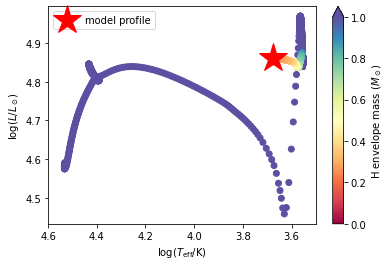

In [66]:
p,h = read_MESA_profile_history("LOGS_Hpoor/", "profile25.data")
make_HR_plot(p,h)

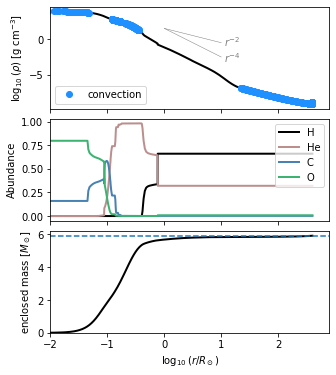

In [67]:
make_structure_plot(p)

<ipython-input-65-17e53f77e99e>:43: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= np.sqrt(p['rt']**3 / (c.G*p['mass']*c.msun) )


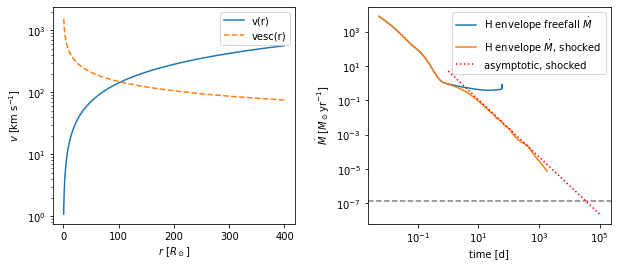

In [68]:
## Add columns for a given shock energy
add_profile_columns_Eshock_fallback(p,Etot=1e47,alpha=1)


# plot velocity profile and fallback
plt.figure(figsize=(10,4))
plt.subplot(121)

# hydrogen envelope
selh1 = p['h1']>0.5

plt.plot(p['r'][selh1]/c.rsun,p['v'][selh1]/1e5,label='v(r)')
plt.plot(p['r'][selh1]/c.rsun,p['vesc'][selh1]/1e5,label='vesc(r)',ls='--')
plt.legend()

plt.semilogy()

plt.ylabel(r'$v$ [km s$^{-1}$]')
plt.xlabel(r'$r$ [$R_\odot$]')


plt.subplot(122)
tscale = 86400
mdscale = c.msun/3.15e7

plt.plot(p['tff'][selh1]/tscale,p['mdot_ff'][selh1]/mdscale,label=r'H envelope freefall $\dot M$')
plt.plot(p['tff_v'][selh1]/tscale,p['mdot_v'][selh1]/mdscale,label=r'H envelope $\dot M$, shocked')

plt.axhline((1.26e38*p['mass'][0] / (0.1*3e10**2)) /mdscale,ls='--',color='grey')
#plt.plot(p['tff_v'][selh1]/tscale,(1.26e38*p['mass'][selh1] / (0.1*3e10**2)) /mdscale, '--',label=r'$\dot M_{\rm Edd}$' )


# asymptotic fallback
ind = np.argmax(p['rt'])
mdnorm = 2/3*np.pi*p['r'][ind]**2 * 10**p['logRho'][ind] *p['vesc'][ind] / mdscale
tnorm = p['tff'][ind]

xp = np.logspace(0,5)*86400
plt.plot(xp/tscale, mdnorm*(xp/tnorm)**(-5/3),'r:',label='asymptotic, shocked' )

plt.legend(loc='upper right')
plt.loglog()
plt.xlabel('time [d]')
plt.ylabel(r'$\dot M \ [M_\odot {\rm yr}^{-1}]$')

plt.subplots_adjust(wspace=0.3)

<ipython-input-36-34a749706d7d>:43: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= np.sqrt(p['rt']**3 / (c.G*p['mass']*c.msun) )


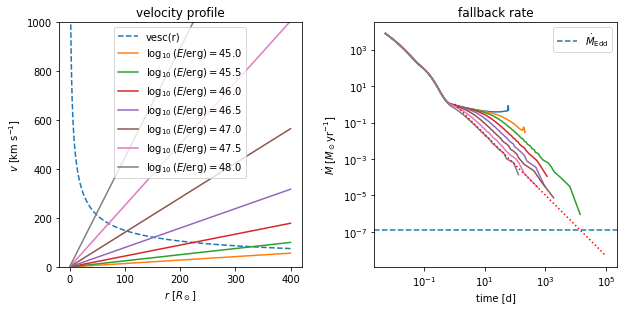

In [40]:
# Same thing with a range of shock energies... 

# add a velocity dv = v*(r/R) (Quataert Kasen J1644)
# normalize to get the total energy
alpha=1
# hydrogen envelope
selh1 = p['h1']>0.5

tscale = 86400
mdscale = c.msun/3.15e7

plt.figure(figsize=(10,4.5))
plt.subplot(121)

def v_r(r_o_R,v0=3e7,alpha=1):
    #return v0*(np.exp(r_o_R**alpha)-1)
    return v0*r_o_R**alpha

Elist = np.logspace(45,48,7)


plt.plot(p['r'][selh1]/c.rsun,p['vesc'][selh1]/1e5,label='vesc(r)',ls='--')
plt.title('velocity profile')
plt.ylabel(r'$v$ [km s$^{-1}$]')
plt.xlabel(r'$r$ [$R_\odot$]')
for Etot in Elist:
    add_profile_columns_Eshock_fallback(p,Etot=Etot,alpha=alpha)
    plt.plot(p['r'][selh1]/c.rsun,p['v'][selh1]/1e5,label=r'$\log_{10}(E / {\rm erg})=$'+str(np.round(np.log10(Etot),1)) )

    
plt.legend()
plt.ylim(0,1000)

plt.subplot(122)
plt.title('fallback rate')
plt.plot(p['tff'][selh1]/tscale,p['mdot_ff'][selh1]/mdscale)
for Etot in Elist:
    add_profile_columns_Eshock_fallback(p,Etot=Etot,alpha=alpha)
    plt.plot(p['tff_v'][selh1]/tscale,p['mdot_v'][selh1]/mdscale)

plt.axhline((1.26e38*p['mass'][0] / (0.1*3e10**2)) /mdscale, ls='--',label=r'$\dot M_{\rm Edd}$')


# asymptotic fallback
ind = np.argmax(p['rt'])
mdnorm = 2/3*np.pi*p['r'][ind]**2 * 10**p['logRho'][ind] *p['vesc'][ind] / mdscale
tnorm = p['tff'][ind]

xp = np.logspace(0,5)*86400
plt.plot(xp/tscale, mdnorm*(xp/tnorm)**(-5/3),'r:' )


plt.legend(loc=0)
plt.loglog()
plt.xlabel('time [d]')
plt.ylabel(r'$\dot M \ [M_\odot {\rm yr}^{-1}]$')

plt.subplots_adjust(wspace=0.3)

<ipython-input-47-1408c7f2b5bb>:10: RuntimeWarning: divide by zero encountered in double_scalars
  vej=np.sqrt(2*Etot/mej)
<ipython-input-36-34a749706d7d>:43: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= np.sqrt(p['rt']**3 / (c.G*p['mass']*c.msun) )


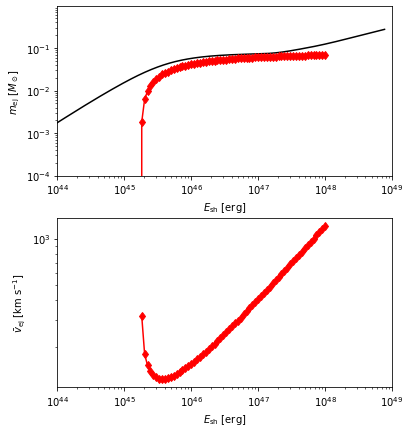

In [47]:
# How much mass is ejected? 
Elist = np.logspace(45,48,70)

alpha = 1
dmlist = []
vlist = []
for Etot in Elist:
    add_profile_columns_Eshock_fallback(p,Etot=Etot,alpha=alpha)
    mej = np.sum(p['dm'][p['rt']<0])
    vej=np.sqrt(2*Etot/mej)
    dmlist.append(mej/c.msun)
    vlist.append(vej)
    

    
Ebind = (c.G*p['mass']*(p['mass'][0]-p['mass'])*c.msun**2/p['r'])[selh1]
dM = (p['mass'][0]-p['mass'])[selh1]


plt.figure(figsize=(6,7))
plt.subplot(211)
plt.plot( Ebind,dM,'k-' )
plt.plot(Elist,dmlist,'rd-')
plt.loglog()

plt.xlim(1.e44,1e49)
plt.ylim(1.e-4,)

plt.ylabel(r'$m_{\rm ej} \ [M_\odot]$ ')
plt.xlabel(r"$E_{\rm sh}$ [erg]" )

plt.subplot(212)

plt.plot(Elist,np.array(vlist)/1e5,'rd-')
plt.xlim(1.e44,1e49)
plt.xlabel(r"$E_{\rm sh}$ [erg]" )
plt.ylabel(r'$\bar v_{\rm ej} \ [{\rm km \ s}^{-1}]$ ')
plt.loglog()

plt.subplots_adjust(hspace=0.25)


<ipython-input-2-28b47dbba367>:11: RuntimeWarning: divide by zero encountered in power
  Lpl = 1.2e42*E51**(5/6) * M10**-0.5 * R500**(2/3) * k04**(-1/3) * T6000**(4/3) # erg/s


(3, 300)

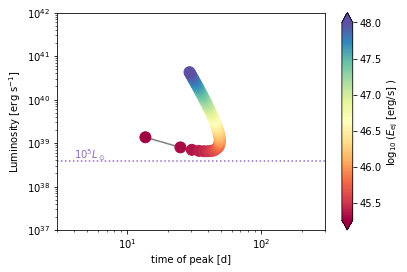

In [53]:
## Given an ejecta mass and mean velocity, plot the luminosity

lp,tp = Lpl_tpl(np.array(Elist),np.array(dmlist),R0,0.32,6000)
plt.plot(tp,lp,color='grey',ls='-',zorder=0)
plt.scatter(tp,lp,c=np.log10(Elist),cmap='Spectral',s=120,marker='o')
plt.colorbar(label=r'$\log_{10}( E_{\rm ej}\ {\rm [erg/s]}\ )$ ',extend='both')


plt.loglog()
plt.axhline(3.84e33*1e5,color='C4',linestyle=':')
plt.annotate(r'$10^5 L_\odot$',(4,3.84e33*1e5*1.15),color='C4',zorder=0)

plt.xlabel('time of peak [d]')
plt.ylabel('Luminosity [erg s$^{-1}$]')
plt.ylim(1e37,1e42)
plt.xlim(3,300)


# Compare the H rich and H poor

['zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'log_g', 'radius', 'pressure_scale_height', 'dq', 'logxq', 'logxm', 'logE', 'logS', 'pgas_div_ptotal', 'eta', 'mu', 'gamma1', 'gamma3', 'csound', 'log_thermal_time_to_surface', 'pp', 'cno', 'tri_alpha', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'log_opacity', 'logL', 'log_L_div_Ledd', 'mlt_mixing_length', 'mlt_mixing_type', 'conv_vel', 'conv_L_div_L', 'conv_vel_div_csound', 'conv_vel_div_L_vel', 'log_mlt_D_mix', 'log_Lconv_div_L', 'mixing_type', 'log_D_mix', 'tau', 'logtau', 'omega', 'i_rot', 'j_rot', 'v_rot', 'w_div_w_crit_roche', 'fp_rot', 'ft_rot', 'ft_rot_div_fp_rot', 'r_e_div_r_p', 'brunt_N', 'lamb_Sl2']
['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'lo

(3.5, 5.5)

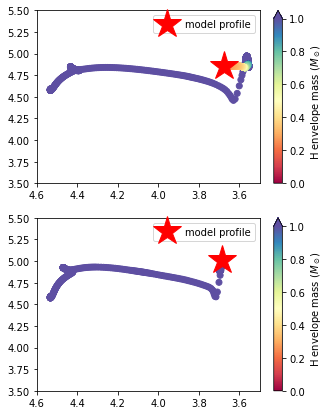

In [64]:
pp,hp = read_MESA_profile_history("LOGS_Hpoor/", "profile25.data")
pr,hr = read_MESA_profile_history("LOGS_Hrich/", "profile7.data")


plt.figure(figsize=(5,7))
plt.subplot(211)
make_HR_plot(pp,hp)
plt.ylim(3.5,5.5)

plt.subplot(212)
make_HR_plot(pr,hr)
plt.ylim(3.5,5.5)

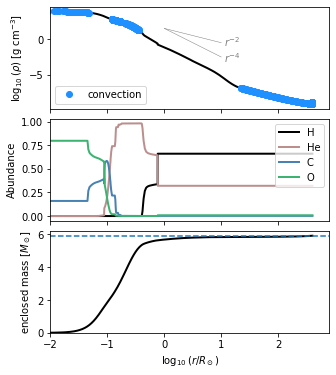

In [70]:
# H poor
make_structure_plot(pp)

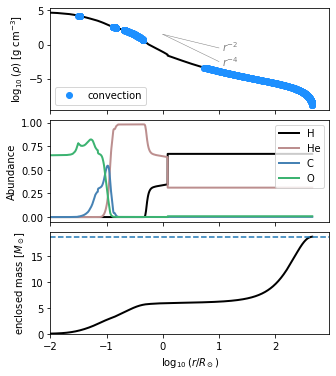

In [75]:
# H rich
make_structure_plot(pr)

<ipython-input-65-17e53f77e99e>:43: RuntimeWarning: invalid value encountered in sqrt
  p['tff_v']= np.sqrt(p['rt']**3 / (c.G*p['mass']*c.msun) )
<ipython-input-102-72be8e990253>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xp/tscale, mdnorm*(xp/tnorm)**(-5/3),'r:',label='asymptotic, shocked',color=color )


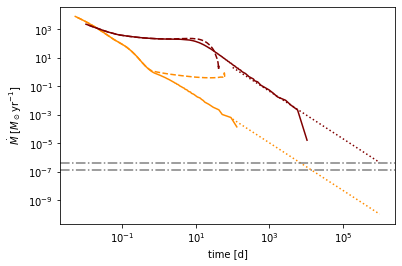

In [102]:
def fallback_plot(p,color='DodgerBlue'):
    tscale = 86400
    mdscale = c.msun/3.15e7
    # hydrogen envelope
    selh1 = p['h1']>0.5

    plt.plot(p['tff'][selh1]/tscale,p['mdot_ff'][selh1]/mdscale,ls='--',label=r'H envelope freefall $\dot M$',color=color)
    plt.plot(p['tff_v'][selh1]/tscale,p['mdot_v'][selh1]/mdscale,label=r'H envelope $\dot M$, shocked',color=color)

    plt.axhline((1.26e38*p['mass'][0] / (0.1*3e10**2)) /mdscale,ls='-.',color='grey')
    #plt.plot(p['tff_v'][selh1]/tscale,(1.26e38*p['mass'][selh1] / (0.1*3e10**2)) /mdscale, '--',label=r'$\dot M_{\rm Edd}$' )


    
    # asymptotic fallback
    ind = np.argmax(p['rt'])
    if(ind>0):
        mdnorm = 2/3*np.pi*p['r'][ind]**2 * 10**p['logRho'][ind] *p['vesc'][ind] / mdscale
        tnorm = p['tff'][ind]

        xp = np.logspace(2,6)*86400
        plt.plot(xp/tscale, mdnorm*(xp/tnorm)**(-5/3),'r:',label='asymptotic, shocked',color=color )

    #plt.legend(loc='lower left')
    plt.loglog()
    plt.xlabel('time [d]')
    plt.ylabel(r'$\dot M \ [M_\odot {\rm yr}^{-1}]$')

    
    

## Add columns for a given shock energy
myE = 1e48
add_profile_columns_Eshock_fallback(pp,Etot=myE,alpha=1)
fallback_plot(pp,color='DarkOrange')

add_profile_columns_Eshock_fallback(pr,Etot=myE,alpha=1)
fallback_plot(pr,color='Maroon')
